In [1]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# lectura de datos 

Datos = pd.read_csv('Mall_Customers.csv')

In [3]:
#lectura de datos

Datos.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
# Descripción de los datos
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos - Ingresos Anuales')

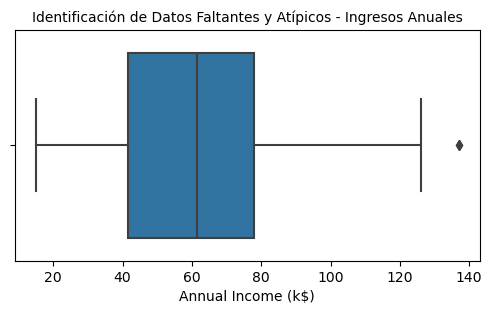

In [5]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos - Ingresos Anuales', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos - Score')

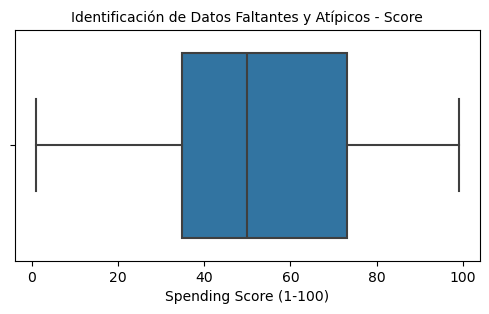

In [6]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Identificación de Datos Faltantes y Atípicos - Score', fontsize=10 )

In [7]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Edad: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Ingresos: ",Datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Puntaje: ",Datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Ingresos:  0
Cantidad de Registros con cero en Puntaje:  0


In [8]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['Age']=Datos['Age'].replace(0,Datos['Age'].mean())

Datos['Annual Income (k$)']=Datos['Annual Income (k$)'].replace(0,Datos['Annual Income (k$)'].mean())

Datos['Spending Score (1-100)']=Datos['Spending Score (1-100)'].replace(0,Datos['Spending Score (1-100)'].mean())

In [9]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# Filtrar columnas del modelo 

Datos = Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]]

Datos.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


In [11]:
X = Datos

X.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


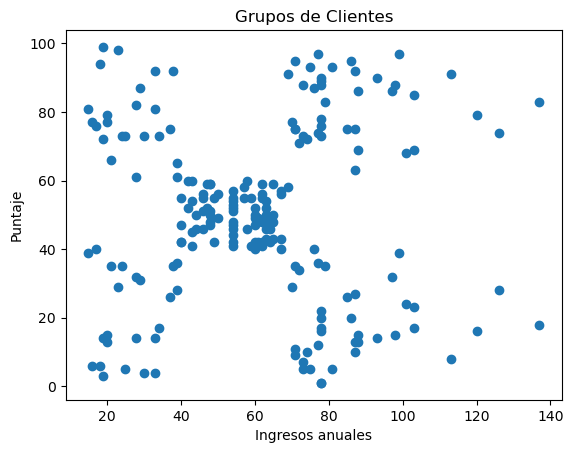

In [12]:
# Grafica antes del agrupamiento

plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'])
plt.xlabel('Ingresos anuales')
plt.ylabel('Puntaje')
plt.title('Grupos de Clientes')
plt.show()

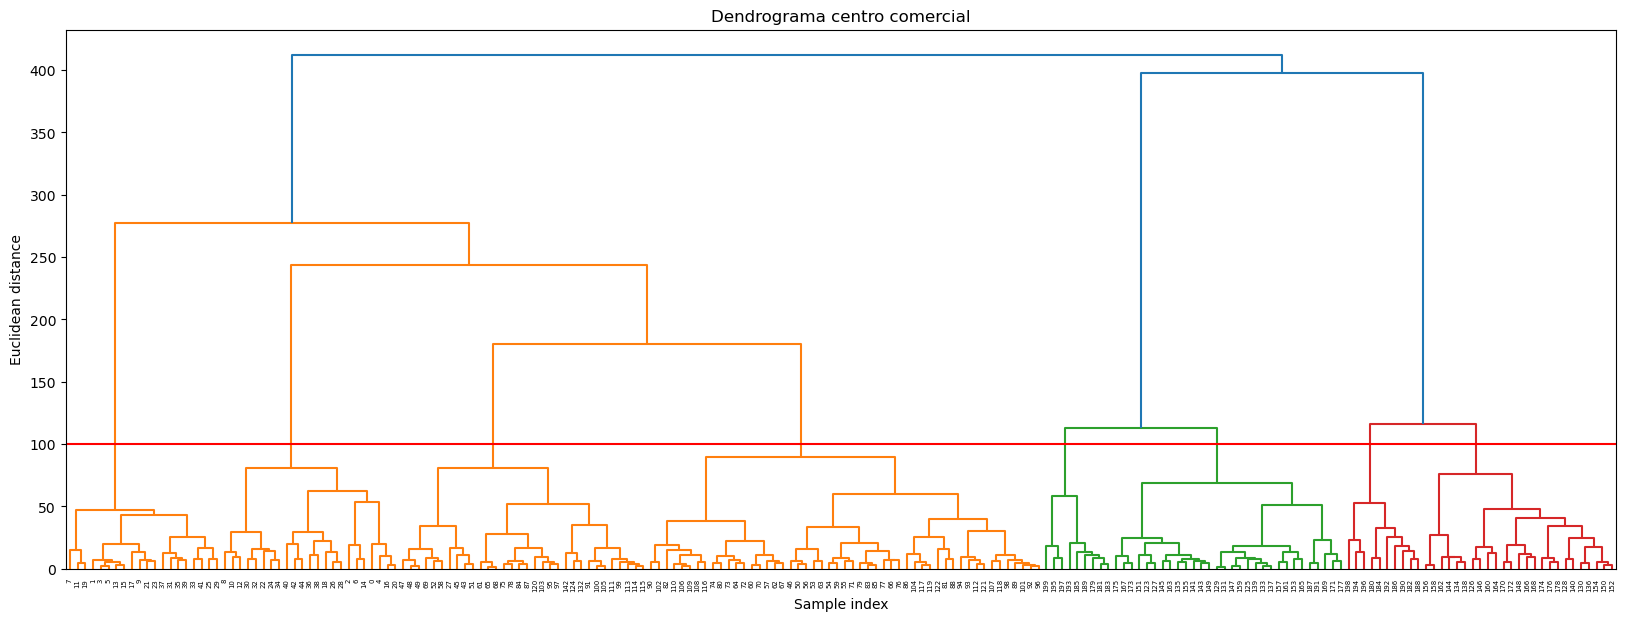

In [13]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 100, color = 'r', linestyle = '-')
plt.title('Dendrograma centro comercial')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [14]:
clustering = AgglomerativeClustering(n_clusters=3)
clustering.fit(X)

Datos['Cluster'] = clustering.labels_

Datos['Cluster']


0      0
1      0
2      0
3      0
4      0
      ..
195    2
196    1
197    2
198    1
199    2
Name: Cluster, Length: 200, dtype: int64

In [15]:
labels = Datos['Cluster']
colores=['orange','green','red']
asignar=[]
for row in labels:
    asignar.append(colores[row])

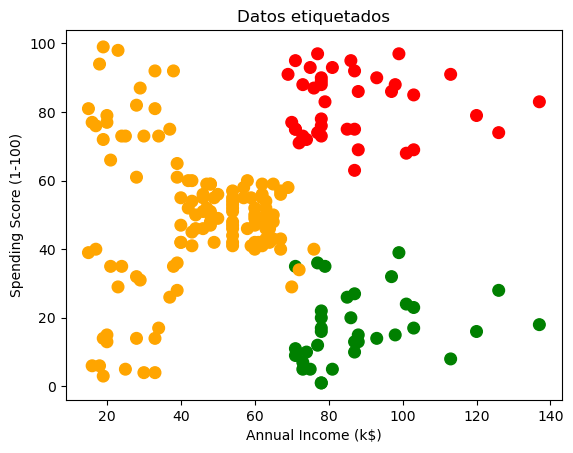

In [16]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [17]:

# Se calculan las métricas
sil_score = silhouette_score(X, labels)
calinski_score = calinski_harabasz_score(X, labels)
davies_score = davies_bouldin_score(X, labels)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
|  Coeficiente Silhouette  | 0.3817258658574508 |
| Indice Calinski Harabasz | 111.54877722398983 |
|  Indice Davies Bouldin   |  0.86001007209252  |
+--------------------------+--------------------+


In [18]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.6689445402905483, array([277.42153431,  53.60747993, 277.42153431, ..., 397.79378086,
        18.27566688, 397.79378086]))
